In [1]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers,layers,models
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense
from keras import backend as k 
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
img_width, img_height = 224, 224
train_data_dir = "/content/train"
validation_data_dir = "/content/validation"
batch_size = 100

#Initializing weights with Imagenet weights
vgg_conv = applications.VGG16(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))

#freezing the layers except last 6 layers
for layer in vgg_conv.layers[:-6]:
    layer.trainable = False
    
for layer in vgg_conv.layers:
    print(layer.name,layer.trainable)
    
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()





58892288/58889256 [==============================] - 3s 0us/step






input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)     

In [0]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_batch_size = 256
valid_batch_size = 64

train_generator = train_datagen.flow_from_directory(directory=train_data_dir,
                  target_size = (img_height, img_width),
                  batch_size = train_batch_size, 
                  class_mode = "categorical",
                  shuffle=True)

validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                       target_size = (img_height, img_width),
                       batch_size = valid_batch_size,
                       class_mode = "categorical",
                       shuffle=True)

opt = Adam(lr=0.0001)
model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics=["accuracy"])

#checkpoint will save the best weights
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1,
      callbacks = callbacks_list
      )
 
#save the model to JSON file
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

Found 9600 images belonging to 6 classes.
Found 2400 images belonging to 6 classes.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
38/37 [==============================] - 80s 2s/step - loss: 3.5466 - acc: 0.6820 - val_loss: 0.0781 - val_acc: 0.9842

Epoch 00001: val_acc improved from -inf to 0.98417, saving model to model_weights.h5
Epoch 2/30
38/37 [==============================] - 62s 2s/step - loss: 0.0502 - acc: 0.9867 - val_loss: 0.0323 - val_acc: 0.9921

Epoch 00002: val_acc improved from 0.98417 to 0.99208, saving model to model_weights.h5
Epoch 3/30
38/37 [==============================] - 63s 2s/step - loss: 0.0153 - acc: 0.9959 - val_loss: 0.0222 - val_acc: 0.9946

Epoch 00003: val_acc improved from 0.99208 to 0.99458, saving model to model_weights.h5
Epoch 4/30
38/37 [==============================] - 63s 2s/step - loss: 0.0064 - acc: 0.9979 - val_loss: 0.0266 - val_acc: 0.9946

Epoch 00004: val_acc did not impr

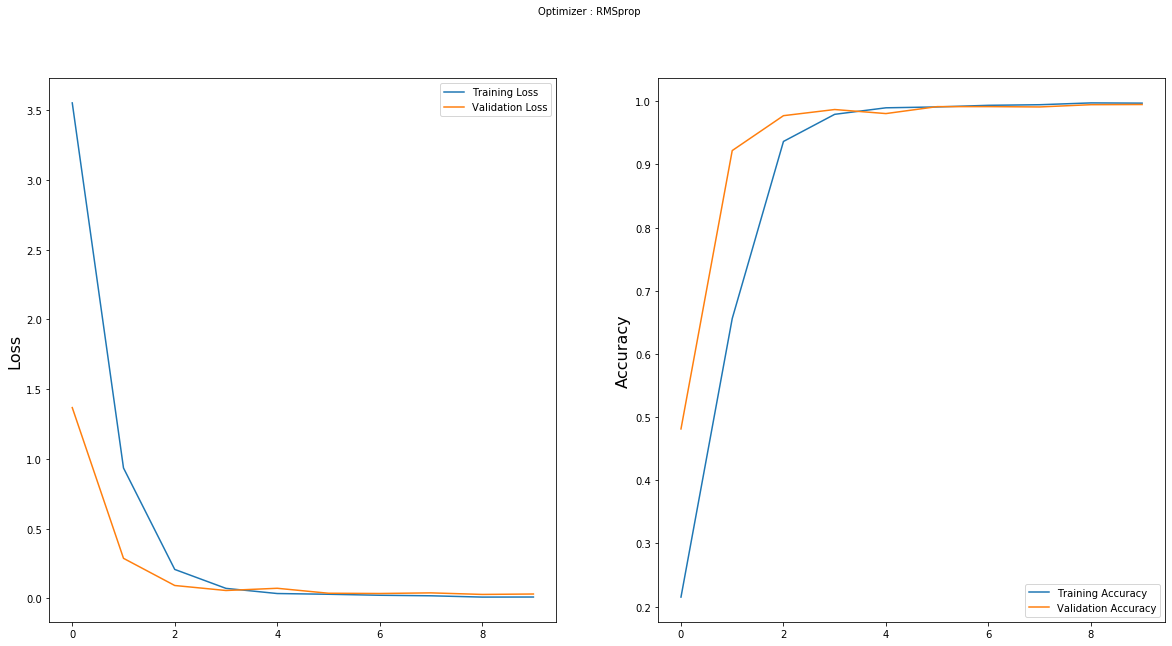

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()